In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [20]:
spikeTrain = [0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0]

In [21]:
lightOnsetTime = 5
spikeValue = 1
spikeTrain[lightOnsetTime:].index(spikeValue)

4

In [22]:
latencyToFirstSpike = spikeTrain[lightOnsetTime:].index(spikeValue) 
print latencyToFirstSpike

4


In [23]:
spikeTimes = [i for i,x in enumerate(spikeTrain) if x==1]
print spikeTimes

[9, 11, 13, 17]


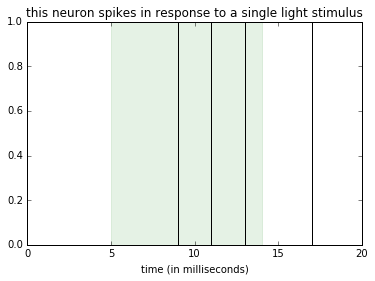

In [28]:
fig = plt.figure()
ax = plt.subplot(111)
plt.vlines(spikeTimes, 0, 1)
plt.axvspan(5,14,alpha=0.1,color='g')
plt.xlim([0,20])
plt.title('this neuron spikes in response to a single light stimulus') 
plt.xlabel('time (in milliseconds)')

In [11]:
tenSpikeTrains = [[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,
0,1,0,0,0],[0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0],[0,0,0,0,0,
0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0],[1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,0
,0,1,1,0,0,1,1,0,0,0],[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0]]

([<matplotlib.axis.YTick at 0x1103e3750>,
 <a list of 10 Text yticklabel objects>)

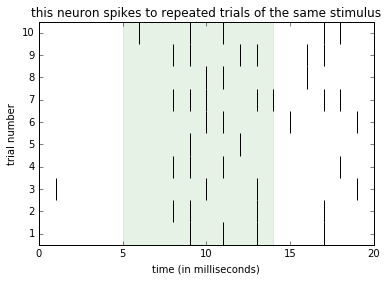

In [29]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
for trial in range(len(tenSpikeTrains)):
    spikeTimes = [i for i,x in enumerate(tenSpikeTrains[trial]) if x==1]
    plt.vlines(spikeTimes,trial,trial+1)
plt.axvspan(5,14,alpha=0.1,color='g')
plt.xlim([0,20])
plt.ylim([0,10])
plt.title('this neuron spikes to repeated trials of the same stimulus')
plt.xlabel('time (in milliseconds)')
plt.ylabel('trial number')
plt.yticks([x+0.5 for x in \
            range(10)],[str(x+1) for x in \
                        range(10)]) #1

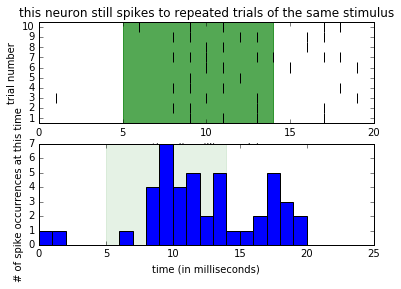

In [17]:
# The Python way for Figure 3.7. 
fig=plt.figure()
ax=plt.subplot(211)
for trial in range(len(tenSpikeTrains)): 
    spikeTimes = [i for i,x in enumerate(tenSpikeTrains[trial]) if x==1] 
    plt.vlines(spikeTimes,trial,trial+1) 
    plt.axvspan(5,14,alpha=0.1,color='g') 
    plt.ylim([0,10])
plt.title('this neuron still spikes to repeated trials of the same stimulus')
plt.xlabel('time (in milliseconds)')
plt.ylabel('trial number')
plt.yticks([x+0.5 for x in range(10)], [str(x+1) for x in range(10)])
ax=plt.subplot(212)
plt.axvspan(5,14,alpha=0.1,color='g')
ax.bar(range(21),np.sum(tenSpikeTrains,0),1)
plt.xlabel('time (in milliseconds)')
plt.ylabel('# of spike occurrences at this time')
# End Python code for Figure 3.7

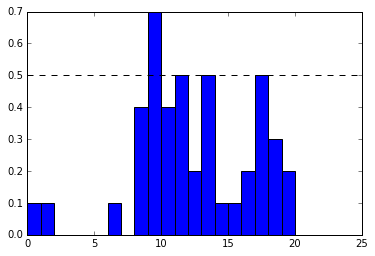

In [14]:
fig=plt.figure()
plt.bar(range(21), np.mean(tenSpikeTrains,0),1)
plt.axhline(y=0.5,xmin=0,xmax=20,linestyle='--',color='k')

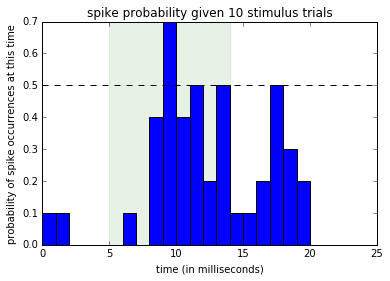

In [13]:
# The Python way for Figure 3.8
fig=plt.figure() 
plt.axvspan(5,14,alpha=0.1,color='g') 
plt.bar(range(21), np.mean(tenSpikeTrains,0),1) 
plt.axhline(y=0.5,xmin=0,xmax=20,linestyle='--',color='k')
plt.title('Spike probability given 10 stimulus trials')
plt.xlabel('time (in milliseconds)')
plt.ylabel('probability of spike occurrences at this time')
plt.savefig('Figure 3.8normalized PSTH with cutoff.png')
# End Python code for Figure 3.8

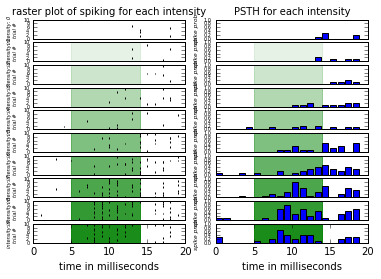

In [1]:
# code for Figure 3.9

with open('tenIntensities.pkl', 'rb') as handle:
    tenIntensities = pickle.load(handle)
fig = plt.figure()
numIntensities = len(tenIntensities)
nbar={}
for key in tenIntensities.keys():
    ax=plt.subplot(numIntensities,2,float(key[0])*2+1)
    for trial in range(10): # this relies on there being 10 trials per stimulus intensit
        plt.vlines(tenIntensities[key][trial],trial,trial+1)
    plt.xlim([0,20]);plt.ylim([0,10])
    plt.ylabel('intensity: '+str(key[0])+'\ntrial # ',style='italic',fontsize=5)
    plt.yticks(fontsize=5)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    if float(key[0]) < 9:
        plt.xlabel('');plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')
    if float(key[0]) == 0:
        plt.title('raster plot of spiking for each intensity',fontsize=10)
    ax=plt.subplot(numIntensities,2,float(key[0])*2+2)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    spikeTimes = [a for b in tenIntensities[key] for a in b] #1
    nOut,bins=np.histogram(spikeTimes,bins=range(20))
    nbar[float(key[0])] = nOut/10.
    plt.bar(bins[:-1],nOut/10.)
    plt.xlim([0,20]); plt.ylim([0,1])
    plt.yticks(fontsize=5)
    plt.ylabel('spike prob',style='italic',fontsize = 6)
    if float(key[0]) == 0:
        plt.title('PSTH for each intensity',fontsize=10)
    if float(key[0]) < numIntensities-1:
        plt.xlabel(''); plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')
#plt.show()
#plt.savefig('Figure subplot 10 intensity rasters and psths.png')

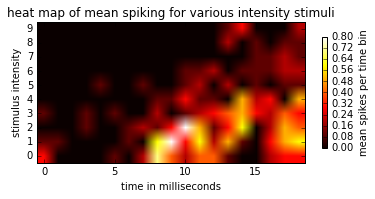

In [4]:
# Begin the Python way for Figure 3.10
fig = plt.figure()
ax = plt.subplot(111)
aa = ax.imshow(nbar.values(),cmap='hot', interpolation='bilinear')
plt.yticks([x for x in range(10)],[str(x) for x in
range(10)[::-1]])
plt.ylabel('stimulus intensity')
plt.xlabel('time in milliseconds')
plt.title('heat map of mean spiking for various intensity stimuli')
cb = fig.colorbar(aa,shrink=0.5) 
cb.ax.set_ylabel('mean spikes per time bin') # End Python way for Figure 3.10

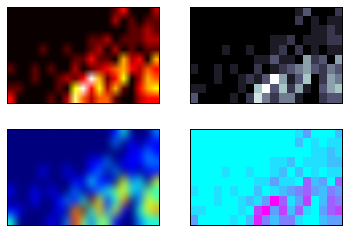

In [6]:
fig = plt.figure(); ax = plt.subplot(221)
aa = ax.imshow(nbar.values(),cmap='hot' ,interpolation='bilinear',aspect=1.2) 
plt.yticks([]); plt.xticks([])
ax = plt.subplot(222)
aa = ax.imshow(nbar.values(),cmap='bone', interpolation='nearest',aspect=1.2) 
plt.yticks([]); plt.xticks([])
ax = plt.subplot(223);
aa = ax.imshow(nbar.values(),cmap='jet', interpolation='bicubic',aspect=1.2) 
plt.yticks([]); plt.xticks([])
ax = plt.subplot(224)
aa = ax.imshow(nbar.values(),cmap='cool', interpolation='nearest',aspect=1.2)
plt.yticks([]); plt.xticks([])
plt.savefig('Figure 3.10- 4 heatmaps labels off.png')